In [22]:
import pandas as pd
import numpy as np
#读取玩家数据
pd_reader = pd.read_csv('XData_eye.csv', encoding = 'utf8',header=0)
XData=pd_reader.values.tolist()

#读取玩家标签数据
pd_reader = pd.read_csv('yLabel.csv', encoding = 'utf8',header=0)
playerLabel=pd_reader.values.tolist()

In [23]:
import math
X=[]
PlayerID=[]
y=[]

for data in XData:
    playerID = data[0]
    x = data[1:]
    ylabel=[]
    for label in playerLabel:
        if playerID == label[0]:
            ylabel.append(label[5]/144)
            x.append(label[1])
            x.append(label[2])
            PlayerID.append(playerID)
            break
            
    if len(ylabel)>=1:
        X.append(x)
        y.append(ylabel)
        
print(len(X),len(X[0]),y)

37 31 [[0.4375], [0.09027777777777778], [0.1527777777777778], [0.19444444444444445], [0.4583333333333333], [0.2777777777777778], [0.5069444444444444], [0.4236111111111111], [0.1388888888888889], [0.4513888888888889], [0.2361111111111111], [0.3472222222222222], [0.18055555555555555], [0.5694444444444444], [0.4236111111111111], [0.3819444444444444], [0.5277777777777778], [0.4375], [0.5694444444444444], [0.3125], [0.4513888888888889], [0.4583333333333333], [0.4791666666666667], [0.625], [0.3194444444444444], [0.6041666666666666], [0.4027777777777778], [0.5902777777777778], [0.4583333333333333], [0.5555555555555556], [0.3333333333333333], [0.3472222222222222], [0.3472222222222222], [0.3611111111111111], [0.5347222222222222], [0.4583333333333333], [0.3611111111111111]]


In [6]:
from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

0.003741766637561207


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

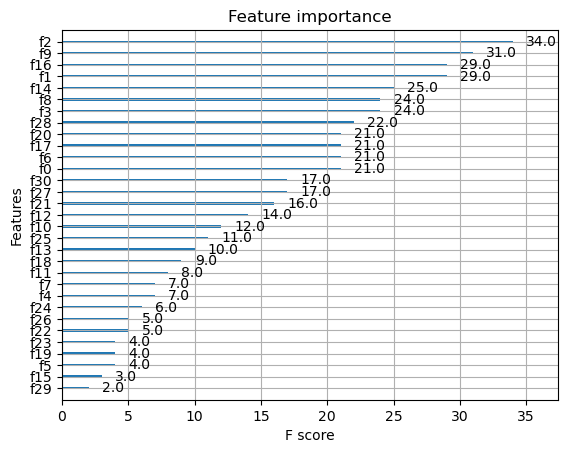

In [24]:
xgb_model = xgb.XGBRegressor(objective='reg:logistic')


xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

mse=mean_squared_error(y, y_pred)

print(np.sqrt(mse))

xgb.plot_importance(xgb_model)

In [25]:
kfold = KFold(n_splits=5, shuffle=True, random_state=3)

scores =[]

y1=[]
y2=[]
for train_index, test_index in kfold.split(X):
    X_train=[]
    X_test=[]
    y_train=[]
    y_test=[]
    for i in train_index:
        X_train.append(X[i])
        y_train.append(y[i])
    for i in test_index:
        X_test.append(X[i])
        y_test.append(y[i])
        
    xgb_model = xgb.XGBRegressor(objective='reg:logistic')
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    print(y_test,'\n',y_pred)
    value=0
    for i in range(0,len(y_pred)):
        if abs(y_pred[i]-y_test[i][0])<0.042:
            value+=1
    print("-----score:",round(value/len(y_pred),5))
    
    scores.append(round(value/len(y_pred)))

print("---mean:",np.mean(scores))
    #print(confusion_matrix(y, y_pred))

[[0.4583333333333333], [0.3819444444444444], [0.4375], [0.5694444444444444], [0.4791666666666667], [0.4027777777777778], [0.4583333333333333], [0.3611111111111111]] 
 [0.3133292  0.23644412 0.30405375 0.45203632 0.45636472 0.4950581
 0.3224995  0.51046586]
-----score: 0.125
[[0.09027777777777778], [0.2777777777777778], [0.5694444444444444], [0.5277777777777778], [0.5902777777777778], [0.3333333333333333], [0.5347222222222222], [0.4583333333333333]] 
 [0.24397177 0.23477094 0.38810748 0.29828823 0.3460608  0.43842992
 0.4046072  0.37750968]
-----score: 0.0
[[0.1527777777777778], [0.5069444444444444], [0.4236111111111111], [0.18055555555555555], [0.4236111111111111], [0.4513888888888889], [0.3611111111111111]] 
 [0.14063503 0.37336573 0.3634757  0.21301164 0.40575036 0.3172091
 0.3036597 ]
-----score: 0.42857
[[0.4513888888888889], [0.2361111111111111], [0.3472222222222222], [0.625], [0.6041666666666666], [0.3472222222222222], [0.3472222222222222]] 
 [0.3697367  0.40247688 0.4922798  0.5

In [51]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))
    
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [52]:

xgb_model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Model with rank: 1
Mean validation score: -0.576 (std: 0.546)
Parameters: {'colsample_bytree': 0.819450608077283, 'gamma': 0.26869780146896144, 'learning_rate': 0.3059566849238281, 'max_depth': 3, 'n_estimators': 106, 'subsample': 0.738781280758491}



In [91]:
kfold = KFold(n_splits=5, shuffle=True, random_state=30)

scores =[]

y1=[]
y2=[]
for train_index, test_index in kfold.split(X):
    X_train=[]
    X_test=[]
    y_train=[]
    y_test=[]
    for i in train_index:
        X_train.append(X[i])
        y_train.append(y[i])
    for i in test_index:
        X_test.append(X[i])
        y_test.append(y[i])
        
    xgb_model = xgb.XGBRegressor( random_state=28,colsample_bytree=0.81945, gamma=0.268698,learning_rate=0.306,max_depth=3,subsample=0.73878,n_estimators=106)
    #xgb_model = xgb.XGBRegressor( random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    #print(y_test,'\n',y_pred)
    value=0
    for i in range(0,len(y_pred)):
        if abs(y_pred[i]-y_test[i][0])<0.5:
            value+=1
        elif y_pred[i]-y_test[i][0]>=1:
            print('---------- more id:',PlayerID[test_index[i]])
        elif y_pred[i]-y_test[i][0]<=-1:
            print('---------- less id:',PlayerID[test_index[i]])
                
    print("-----score:",round(value/len(y_pred),5))
    
    y1.extend(y_test)
    y2.extend(y_pred)
    
    scores.append(round(value/len(y_pred),5))

print("---mean:",np.mean(scores))
print(len(y2))
    #print(confusion_matrix(y, y_pred))

---------- more id: A07
---------- more id: A20
---------- less id: C18
---------- less id: C21
---------- less id: C26
---------- more id: C30
-----score: 0.125
---------- more id: C09
---------- more id: C20
---------- more id: C27
-----score: 0.25
---------- less id: C05
---------- more id: C47
-----score: 0.28571
---------- less id: C01
---------- less id: C08
---------- more id: C17
-----score: 0.57143
---------- more id: A05
---------- more id: A28
---------- less id: C15
-----score: 0.28571
---mean: 0.30357
37


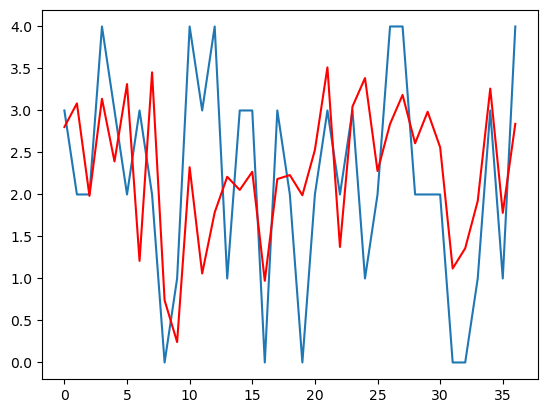

In [84]:
import matplotlib.pyplot as plt

xAxis = np.arange(0,37,1)


plt.plot(xAxis,y1,label='原始值')
plt.plot(xAxis,y2,label='预测值',color='red')

plt.show()